Atomic Frequency Comb Efficiency Modelling
Finley Giles-Book - fdg2@hw.ac.uk - 1/03/2021

Modelling the efficiency equations for impedance-matched cavity enhanced AFC storage

Based off paper 3 from README

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# reduction in effieiceny due to AFC teeth have finite width
def eta_FG(F):   # assumes gaussian teeth 
    
    eta = np.exp(-7/F**2)
    
    return eta

def eta_FS(F):  # Assumes square teeth

    eta = np.sinc(1/F)
    
    return eta

#This model takes into a count the imperfect background radiation.
def eta_total(d_tilde,R1,R2,eta_F,d0):
    
    eta = ((2 * d_tilde * np.exp(-d_tilde) * (1 - R1) * np.sqrt(R2) * np.sqrt(eta_F) * np.exp(-d0)) / (1 - np.sqrt(R1 * R2) * np.exp(-d_tilde))**2)
    
    return eta

# Paper 4
# Cavity-enhanced storage in an optical spin-wave memory
# P. Jobez1, I. Usmani1z, N. Timoney1, C. Laplane1, N. Gisin1, M. Afzelius1

# Reduction in efficiency due to finite teeth width 
def eta_finite_d_tilde(d,F,d0):
    
    eta = ((d-d0)/F)**2 / np.sinh((d-d0)/F)**2
    
    return eta

def eta_non_unity_R2(R2,d,F,d0):
    
    eta = 1 / (1 + (1 - R2)/(4*(d-d0)/F))**4
    
    return eta

C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\612865783.py:4: RuntimeWarning: divide by zero encountered in divide
  d_tilde = d/F
C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\3452469476.py:31: RuntimeWarning: divide by zero encountered in divide
  eta = ((d-d0)/F)**2 / np.sinh((d-d0)/F)**2
C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\3452469476.py:31: RuntimeWarning: invalid value encountered in divide
  eta = ((d-d0)/F)**2 / np.sinh((d-d0)/F)**2


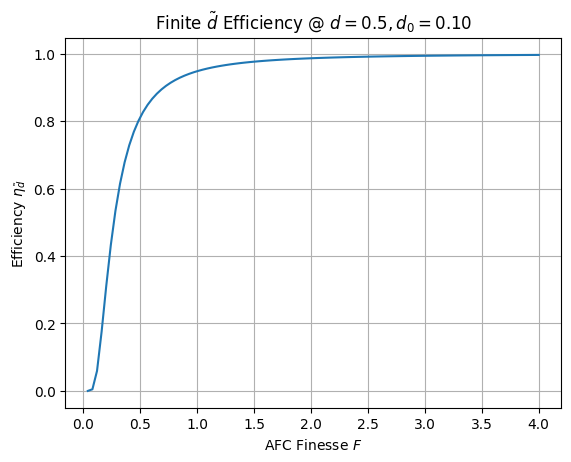

In [2]:
d0 = 0.1
d = 0.5
F = np.linspace(0,4,100)
d_tilde = d/F

fig1 = plt.figure()
plt.title(r'Finite $\tilde{d}$ Efficiency @ $d = %0.1f, d_0 = %0.2f$' %(d, d0))

plt.plot(F,eta_finite_d_tilde(d,F,d0))
plt.xlabel(r'AFC Finesse $F$')
plt.ylabel(r'Efficiency $\eta_{\tilde{d}}$')
plt.grid('true')

C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\1625433374.py:5: RuntimeWarning: divide by zero encountered in divide
  d_tilde = d/F
C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\3452469476.py:37: RuntimeWarning: divide by zero encountered in divide
  eta = 1 / (1 + (1 - R2)/(4*(d-d0)/F))**4
C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\3452469476.py:31: RuntimeWarning: divide by zero encountered in divide
  eta = ((d-d0)/F)**2 / np.sinh((d-d0)/F)**2
C:\Users\fdg2\AppData\Local\Temp\ipykernel_172\3452469476.py:31: RuntimeWarning: invalid value encountered in divide
  eta = ((d-d0)/F)**2 / np.sinh((d-d0)/F)**2


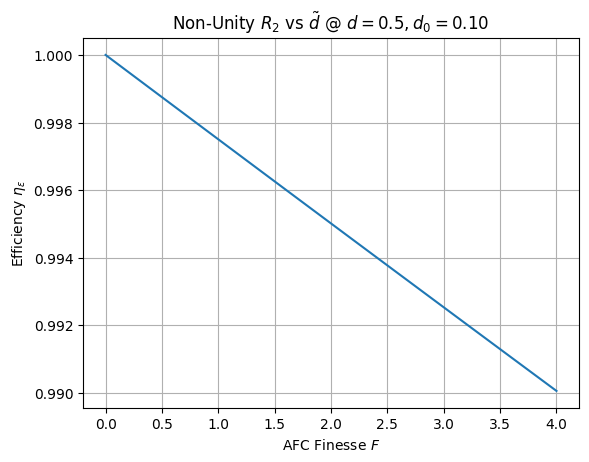

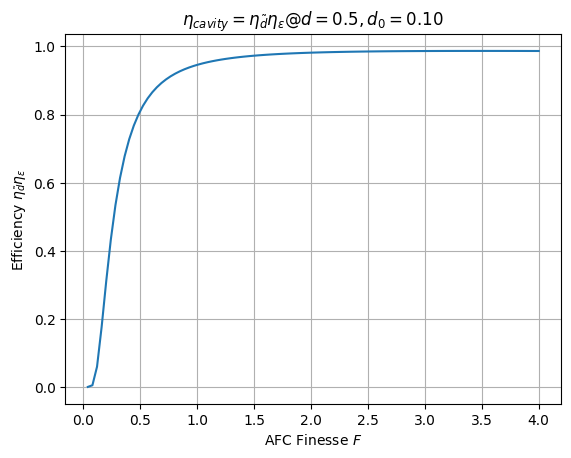

In [4]:
d0 = 0.1
d = 0.5 
R2 = 0.999
F = np.linspace(0,4,100)
d_tilde = d/F

fig2 = plt.figure()
plt.title(r'Non-Unity $R_2$ vs $\tilde{d}$ @ $d = %0.1f, d_0 = %0.2f$' %(d, d0))

plt.plot(F,eta_non_unity_R2(R2,d,F,d0))
plt.xlabel(r'AFC Finesse $F$')
plt.ylabel(r'Efficiency $\eta_{\epsilon}$')
plt.grid('true')

fig4 = plt.figure()
plt.title(r"$\eta_{cavity} = \eta_{\tilde{d}}\eta_{\epsilon} @ d = %0.1f, d_0 = %0.2f$" %(d, d0))

plt.plot(F,eta_non_unity_R2(R2, d, F, d0)*eta_finite_d_tilde(d,F,d0))
plt.xlabel(r'AFC Finesse $F$')
plt.ylabel(r'Efficiency $\eta_{\tilde{d}}\eta_{\epsilon}$')
plt.grid('true')

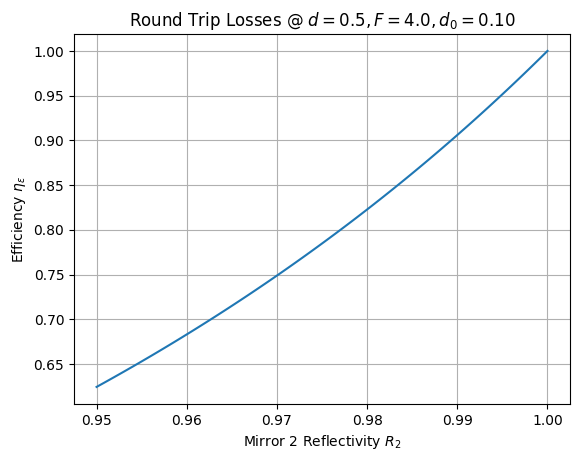

In [5]:
F = 4
R2 = np.linspace(0.95,1,100)
d_tilde = d/F

fig3 = plt.figure()
plt.title(r'Round Trip Losses @ $d = %0.1f, F = %0.1f, d_0 = %0.2f$' %(d, F, d0))

plt.plot(R2,eta_non_unity_R2(R2,d,F,d0))
plt.xlabel(r'Mirror 2 Reflectivity $R_2$')
plt.ylabel(r'Efficiency $\eta_{\epsilon}$')
plt.grid('true')

In [6]:
def eta_optical_losses(eps,d,F,d0):
    
    eta = 1 / (1 + (eps)/(4*(d-d0)/F))**4
    
    return eta

d0 = 0
d = 1
F = 4
eps = (1 - 0.999) + (1 - 10**(-0.5*1/10))
d_tilde = d/F

print('Bulk Efficiency = ', eta_finite_d_tilde(d, F, d0)*eta_optical_losses(eps,d,F,d0))

Bulk Efficiency =  0.6457610214436739
